In [16]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from dnn_utils import load_data
from app_dnn_utils import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) 
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data('./datasets/catvnoncat/train.h5', './datasets/catvnoncat/test.h5')

In [18]:
print("Training set shapes:", train_x_orig.shape, train_y.shape)
print("Testing set shapes:", test_x_orig.shape, test_y.shape)

Training set shapes: (209, 64, 64, 3) (1, 209)
Testing set shapes: (50, 64, 64, 3) (1, 50)


In [19]:
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


In [20]:
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


In [21]:
n_x = 12288     
n_h = 7
n_y = 1
layers_dims = (n_x, n_h, n_y)
learning_rate = 0.0075

In [22]:
layers_dims = [12288, 20, 7, 5, 1]

In [23]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    np.random.seed(1)
    costs = []                        
    
    parameters = initialize_parameters_deep(layers_dims)
    
    for i in range(0, num_iterations):
        AL, caches = L_model_forward(X, parameters)
        
        cost = compute_cost(AL, Y)
        
        grads = L_model_backward(AL, Y, caches)
        
        parameters = update_parameters(parameters, grads, learning_rate)

        if print_cost and i % 100 == 0 or i == num_iterations - 1:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0 or i == num_iterations:
            costs.append(cost)
    
    return parameters, costs

In [24]:
def plot_costs(costs, learning_rate=0.0075):
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

In [25]:
parameters, costs = L_layer_model(train_x, train_y, layers_dims, num_iterations = 1, print_cost = False)

print("Cost after first iteration: " + str(costs[0]))

Cost after iteration 0: 0.8116017481136114
Cost after first iteration: 0.8116017481136114


Cost after iteration 0: 0.8116017481136114
Cost after iteration 100: 0.6676695646220321
Cost after iteration 200: 0.6339824668918083
Cost after iteration 300: 0.6057467650054879
Cost after iteration 400: 0.5629711332996642
Cost after iteration 500: 0.41594126531630204
Cost after iteration 600: 0.3204714324288977
Cost after iteration 700: 0.2324734795290719
Cost after iteration 800: 0.14847577500848438
Cost after iteration 900: 0.08750257977951129
Cost after iteration 1000: 0.05738770594106722
Cost after iteration 1100: 0.03993652491220219
Cost after iteration 1200: 0.030270549594624815
Cost after iteration 1300: 0.024070231198004267
Cost after iteration 1400: 0.01965655605935522
Cost after iteration 1500: 0.016491698536305242
Cost after iteration 1600: 0.01416940230780497
Cost after iteration 1700: 0.0121924184357857
Cost after iteration 1800: 0.010697445643829268
Cost after iteration 1900: 0.009464245952082279
Cost after iteration 2000: 0.0084878494549911
Cost after iteration 2100: 0.

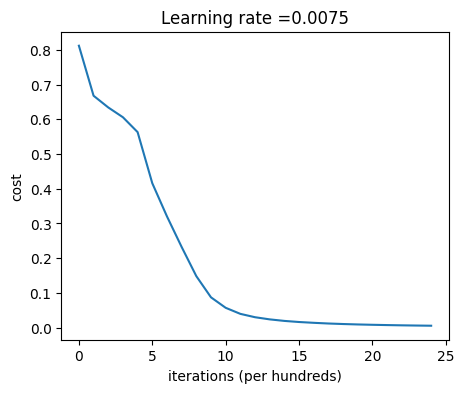

In [26]:
parameters, costs = L_layer_model(train_x, train_y, layers_dims, num_iterations = 2500, print_cost = True)
plot_costs(costs, learning_rate)

In [27]:
def accuracy(X, Y, parameters):
    AL, caches = L_model_forward(X, parameters)
    Yhat = np.copy(AL)
    Yhat[Yhat >= 0.5] = 1
    Yhat[Yhat < 0.5] =0
    accuracy = (X.shape[1]-np.sum(np.abs(np.subtract(Y,Yhat)), axis=1))/X.shape[1]
    return accuracy[0] * 100 

In [28]:
predictions_train = accuracy(train_x, train_y, parameters)
predictions_test = accuracy(test_x, test_y, parameters)
print(f'predictions train accuracy {predictions_train}, predictions test accuracy {predictions_test}')

predictions train accuracy 100.0, predictions test accuracy 80.0
